# Gráfico de linha e uso básico da biblioteca
- Vamos explorar o básico da bilbioteca utilizando o gráfico de linha
- Na anatomia da lib, é utilizado o `Line2D` para plotar ele
- Aqui, vamos usar a biblioteca em mais alto nível, e deixar que as definições do background sejam feitas de maneira transparente
- No notebook 01 já fizemos alguns dois plots de linha para exemplificar a orientação a objetos e o método MATLAB-like

In [1]:
import matplotlib.pyplot as plt
import numpy as np

- Como sempre, temos que criar a `Figure` e o `Axes`
- Podemos obter isso de duas formas

1. **Obtendo de maneira separada:**

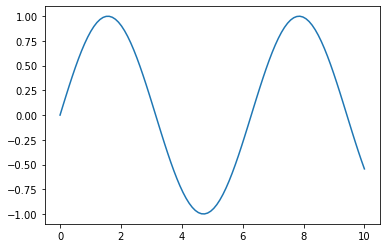

In [3]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

- Observe que o método `ax.plot()` retorna uma `Line2D` que foi adicionada no `Axes`
- Da mesma forma que é explorado na anatomia, podemos acessar e modificar aqui
- Por exemplo:

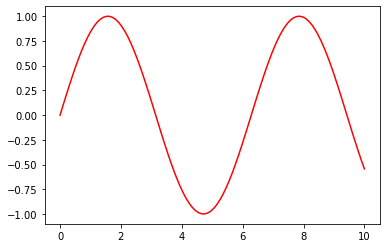

In [6]:
ax.lines[0].set_color("red")
fig

- Perceba que por conhecer a anatomia da biblioteca, você é capaz de fazer diversas customizações/modificações

2. **Obtendo de maneira conjunta:**

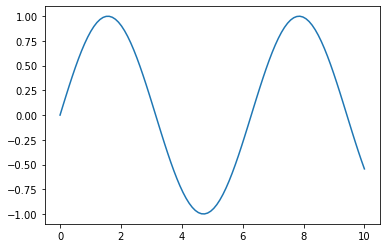

In [7]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

- Particularmente eu prefiro dessa maneira, pois podemos explorar o método `subplots()`
- Porém, caso você queira fazer apenas um plot super rápido, basta usar o método `plt.plot()`

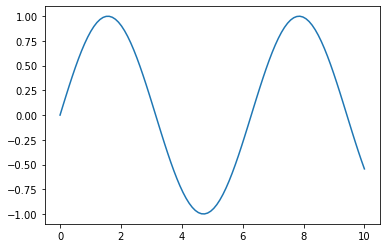

In [8]:
plt.plot(x, np.sin(x))

## Propriedades e customizações básicas
- Os dois métodos (OO e MATLAB-like) compartolham muita coisa em comum na hora de fazer um plot
- Vamos começar com as customizações básicas

In [9]:
x = np.linspace(0, 100, 100)
y = lambda x, b: x*0.1 + b

### Ajustado cores e estilos
- Podemos escolher a cor de um plot de várias maneiras
- [Documentação](https://matplotlib.org/2.0.0/api/colors_api.html)

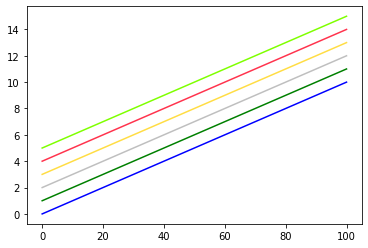

In [13]:
plt.plot(x, y(x, 0), color='blue') # especificando pelo nome
plt.plot(x, y(x, 1), color='g') # por alias
plt.plot(x, y(x, 2), color='0.75') # níveis de cinza entre 0 e 1 
plt.plot(x, y(x, 3), color='#FFDD44') # Hexadecimal
plt.plot(x, y(x, 4), color=(1.0,0.2,0.3)) # tuplas rgb entre 0 e 1
plt.plot(x, y(x, 5), color='chartreuse'); # cores HTML suportadas

- Se não definirmos as cores, será feito por cores padrões que a lib define

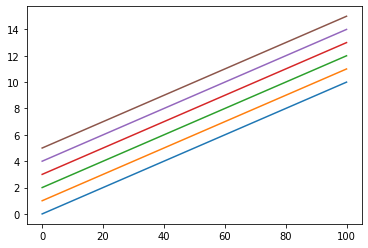

In [14]:
plt.plot(x, y(x, 0))
plt.plot(x, y(x, 1))
plt.plot(x, y(x, 2))
plt.plot(x, y(x, 3))
plt.plot(x, y(x, 4))
plt.plot(x, y(x, 5))

### Ajustando estilos das linhas
- De maneira similar, podemos ajustar o estilo das linhas

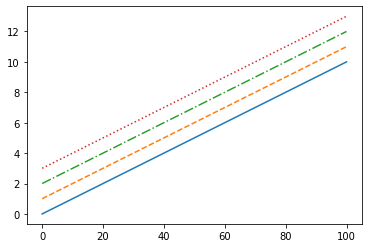

In [15]:
plt.plot(x, y(x, 0), linestyle='solid') 
plt.plot(x, y(x, 1), linestyle='dashed')
plt.plot(x, y(x, 2), linestyle='dashdot')
plt.plot(x, y(x, 3), linestyle='dotted');

- Também pode ser feito de maneira abreviada

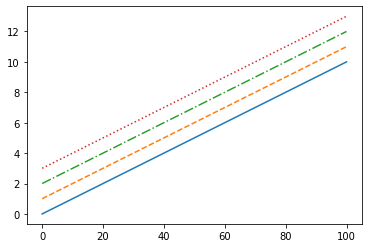

In [16]:
plt.plot(x, y(x, 0), linestyle='-') 
plt.plot(x, y(x, 1), linestyle='--')
plt.plot(x, y(x, 2), linestyle='-.')
plt.plot(x, y(x, 3), linestyle=':');

### Estilo e linha no mesmo parâmetro
- Se vocês estiver com tanta pressa que nao consegue escrever dois parametros separados, você pode colocar cor e estilo juntos
    - Eu particularmente não gosto dessa sintaxe

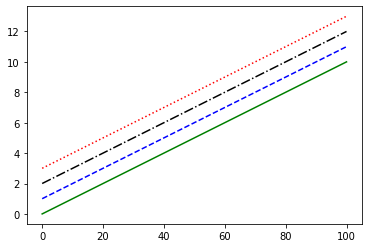

In [18]:
plt.plot(x, y(x, 0), '-g') # - e verde (Green)
plt.plot(x, y(x, 1), '--b') # -- e azul (Blue)
plt.plot(x, y(x, 2), '-.k') # -. e preto (blacK)
plt.plot(x, y(x, 3), ':r'); # : e vermelho (Red)

- **Tudo isso funciona de maneira igual para o método OO**

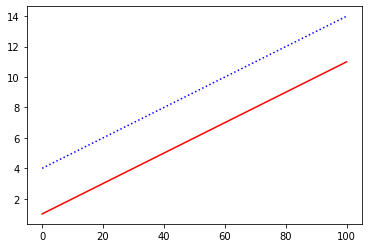

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y(x, 1), color="r", linestyle="solid")
ax.plot(x, y(x, 4), color="b", linestyle="dotted")

### Ajustando os limites dos eixos
- A biblioteca faz um bom trabalho escolhendo os limites automaticamente pra gente
- Mas podemos controlá-los de maneira fácil
- Podemos usar o `plt.xlim()` e `plt.ylim()`, que recebe as coordenadas inicial e final de cada eixo

(-5.0, 30.0)

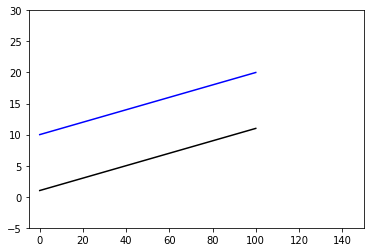

In [23]:
plt.plot(x, y(x, 10), color="b")
plt.plot(x, y(x, 1), color="k")
plt.xlim(-5, 150)
plt.ylim(-5, 30)

(2.0, 12.0)

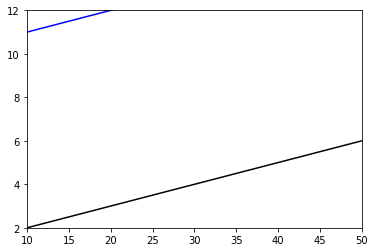

In [26]:
plt.plot(x, y(x, 10), color="b")
plt.plot(x, y(x, 1), color="k")
plt.xlim(10, 50)
plt.ylim(2, 12)

- Perceba que nesse ultimo caso estamos perdendo parte do plot
- Isso pode ser interessante caso seja de nosso interesse destacar uma parte específica do plot
- Uma outra opção é usar o `plt.axis()` que recebe como entrada um lista ou tupla com `(xmin, xmax, ymin, ymax)`

(10.0, 50.0, 2.0, 12.0)

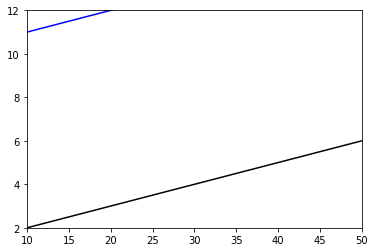

In [28]:
plt.plot(x, y(x, 10), color="b")
plt.plot(x, y(x, 1), color="k")
plt.axis((10, 50, 2, 12))

- Esse método também pode receber como parametro um string:
    - `tighten`: faz um ajuste fino automático
    - `equal`: garante um aspect ratio igual

(-5.0, 105.0, 0.04999999999999993, 20.95)

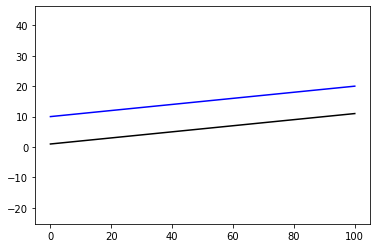

In [29]:
plt.plot(x, y(x, 10), color="b")
plt.plot(x, y(x, 1), color="k")
plt.axis("equal")

### Criando título, labels e legendas
- Como já vimos na parte da anatomia do plot, podemos criar títulos, labels e legendas
- Aqui vamos abstrair bastante e deixar a lib trabalhar a nosso favor
- Caso seja necessário uma edição mais profunda, a gente recorre aos métodos que vimos la
- Como disse, mais de 90% das vezes, o básico da biblioteca é o suficiente

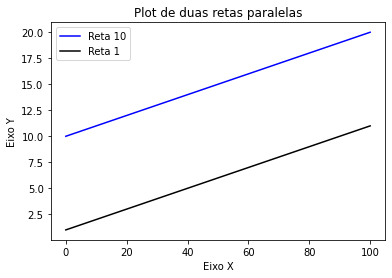

In [31]:
plt.plot(x, y(x, 10), color="b", label="Reta 10")
plt.plot(x, y(x, 1), color="k", label="Reta 1")
plt.title("Plot de duas retas paralelas")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()

- Também é possível configurar a legenda depois:

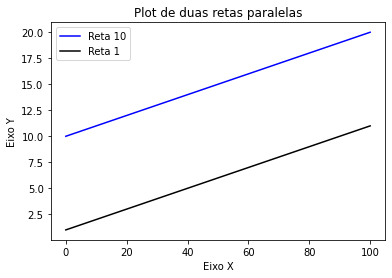

In [32]:
plt.plot(x, y(x, 10), color="b")
plt.plot(x, y(x, 1), color="k")
plt.title("Plot de duas retas paralelas")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend(labels=["Reta 10", "Reta 1"]) # tem que respeitar a sequência, se não faz errado

### Importante
- A maioria dos métodos que usamos na abordagem MATLAB-like, também possível usar para OO
    - Ex: `plt.plot()` -->  `ax.plot()`,  `plt.legend()` -->  `ax.legend()`, etc
- Porém, existem algumas diferenças quando temos algum comando
- Funções para setar limites, labels, e títulos são um pouquinho diferentes
    - `plt.xlabel()` --> `ax.set_xlabel()`
    - `plt.ylabel()` --> `ax.set_ylabel()`
    - `plt.xlim()` --> `ax.set_xlim()`
    - `plt.ylim()` --> `ax.set_ylim()`
    - `plt.title()` --> `ax.set_title()`   

- Podemos chamar cada uma dessas funções individualmente, ou usar o *wrapper* `ax.set()`

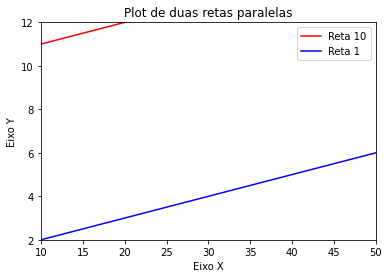

In [35]:
fig, ax = plt.subplots()
ax.plot(x, y(x, 10), color="r")
ax.plot(x, y(x, 1), color="b")
ax.set(
    xlim=(10, 50),
    ylim=(2, 12),
    xlabel="Eixo X",
    ylabel="Eixo Y",
    title="Plot de duas retas paralelas"
)
ax.legend(["Reta 10", "Reta 1"])

- Se quisermos salvar esse plot:

In [56]:
fig.savefig("minha_fig.png", dpi=100)

# Subplots
- Como vimos no Notebook 01, uma vantagem de utilizar o método `subplots()` é poder plotar diferentes plots em áreas diferentes
- Isso só é possível utilizando a abordagem de orientação a objeto
- Os dois parâmetros principais do método são `nrows` e `ncols`
    - [Documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

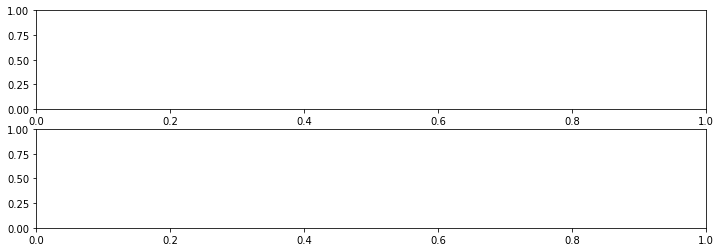

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 4))
ax

- É importante observar, que agora `ax` é um array
    - Como são multiplos, é comum chamar de `axes`, mas não confundir com a classe `Axes`
- Cada posição faz um plot em algum dos `Axes`

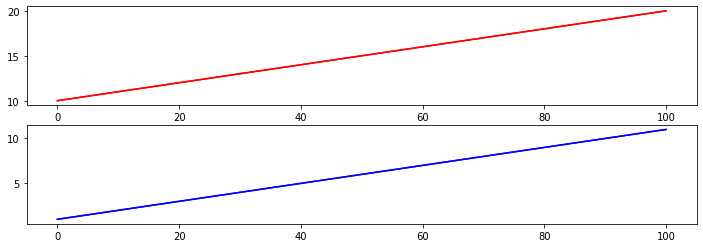

In [41]:
ax[0].plot(x, y(x, 10), color="r")
ax[1].plot(x, y(x, 1), color="b")
fig

- O restante, funciona da mesma maneira. Porém, agora tem que chamar dentro de cada posição do array

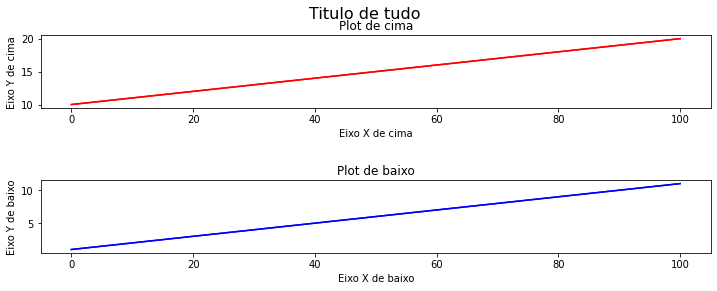

In [53]:
ax[0].set_title("Plot de cima")
ax[0].set_xlabel("Eixo X de cima")
ax[0].set_ylabel("Eixo Y de cima")

ax[1].set_title("Plot de baixo")
ax[1].set_xlabel("Eixo X de baixo")
ax[1].set_ylabel("Eixo Y de baixo")

fig.suptitle("Titulo de tudo", fontsize=16) # definindo o titulo global
fig.subplots_adjust(hspace=1.0) # ajustando o espaço entre os plots (neste caso, apenas na horizontal)

fig

- Os grids podem ser da maneira que você desejar:
    - Os parametros `sharex` e `sharey` são usados para compartilhar os labels internos para ficar mais limpo o plot

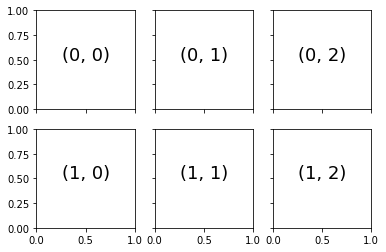

In [55]:
linhas, colunas = 2, 3
fig, ax = plt.subplots(nrows=linhas, ncols=colunas, sharex='col', sharey='row')

for i in range(linhas):
    for j in range(colunas):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')

## Exercício 1:
- Faça uma função que receba como parâmetros `data, labels, colors, title, figsize, save_path`
    - `data`: uma lista de arrays para ser plotados
    - `labels`: o label de cada plot
    - `colors`: a cor de cada plot
    - `title`:  o título global dos plots
    - `figsize`: o tamanho da figura
    - `savepath`: o caminho completo (com nome e extensão) para salvar a figura    
    
- Cada plot deve ser um subplot acima do anterior, respeitando a ordem dos dados dentro de `data`
- Ex: se houver 3 plots a ser feito, você deve retornar uma figura em que mais ou menos assim:

```text
              Title
--------------------------------------
|             Plot 1                 |
--------------------------------------

--------------------------------------
|             Plot 2                 |
--------------------------------------

--------------------------------------
|             Plot 3                 |
--------------------------------------

```